## LAB-3: Create a simple quantum circuit using basic gates

## Name: Neelanjan Dutta

## Register number: 2448040

## Importing libraries:

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from IPython.display import display

backend = AerSimulator()

## Simple quantum circuit using basic gates:

## (a)Classical NOT gate:

Verifying the NOT Gate
Input: 0, Output: 1
Input: 1, Output: 0

Example Circuit for NOT(0):


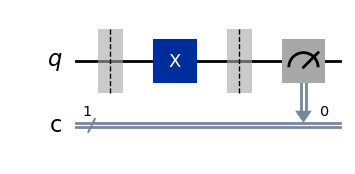

In [2]:
print("Verifying the NOT Gate")

# Loop through all possible inputs (0 and 1).
for input1 in [0, 1]:
    # Create a circuit with 1 qubit and 1 classical bit.
    qc_not = QuantumCircuit(1, 1)

    # Prepare the input state on qubit 0.
    if input1 == 1:
        qc_not.x(0)
    
    qc_not.barrier()

    # Apply the logic for the NOT gate.
    qc_not.x(0)

    qc_not.barrier()
    
    # Measure the qubit.
    qc_not.measure(0, 0)

    # Simulate and print the result.
    job = backend.run(transpile(qc_not, backend), shots=1)
    output = int(list(job.result().get_counts().keys())[0])
    print(f"Input: {input1}, Output: {output}")

#Visualization
qc_not_example = QuantumCircuit(1, 1)
qc_not_example.barrier()
qc_not_example.x(0)
qc_not_example.barrier()
qc_not_example.measure(0, 0)
print("\nExample Circuit for NOT(0):")
display(qc_not_example.draw('mpl'))

The time complexity for the above code is O(1) since the code performs a fixed number of constant operations

## (b) Classical AND Gate:

Verifying the AND Gate
Input: 00, Output: 0
Input: 01, Output: 0
Input: 10, Output: 0
Input: 11, Output: 1

Example Circuit for AND(1,1):


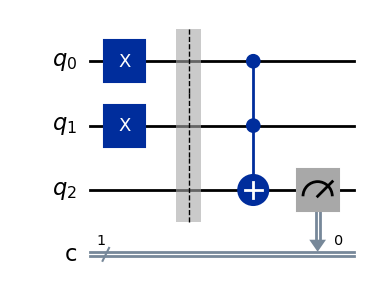

In [3]:
print("Verifying the AND Gate")

# We will loop through all 4 possible inputs to verify the truth table.
for input1 in [0, 1]:
    for input2 in [0, 1]:
        # Create a circuit with 3 qubits (2 inputs, 1 output) and 1 classical bit.
        qc_and = QuantumCircuit(3, 1)

        # Prepare the input states on qubits 0 and 1.
        if input1 == 1:
            qc_and.x(0)
        if input2 == 1:
            qc_and.x(1)
        
        qc_and.barrier()

        # Apply the Toffoli (CCX) gate. q_0 and q_1 are controls, q_2 is the target.
        qc_and.ccx(0, 1, 2)
        qc_and.barrier()

        # Measure the target qubit.
        qc_and.measure(2, 0)

        # Simulate and print the result for this input pair.
        job = backend.run(transpile(qc_and, backend), shots=1)
        output = int(list(job.result().get_counts().keys())[0])
        print(f"Input: {input1}{input2}, Output: {output}")

# Visualization
# Let's draw the circuit for the AND(1,1) case.
qc_and_example = QuantumCircuit(3, 1)
qc_and_example.x(0)
qc_and_example.x(1)
qc_and_example.barrier()
qc_and_example.ccx(0, 1, 2)
qc_and_example.measure(2, 0)
print("\nExample Circuit for AND(1,1):")
display(qc_and_example.draw('mpl'))

The time complexity for the above code is still O(1), even though we have two nested for loops; the number of times they run is fixed and constant.

## (c) Classical OR Gate:

Verifying the OR Gate
Input: 00, Output: 0
Input: 01, Output: 1
Input: 10, Output: 1
Input: 11, Output: 1

Example Circuit for OR(0,1):


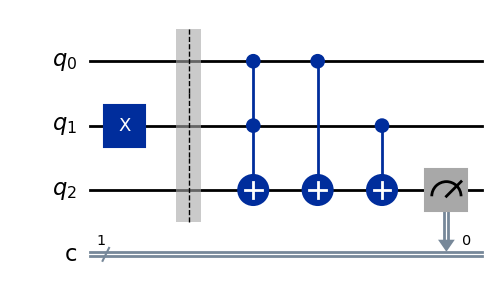

In [4]:
print("Verifying the OR Gate")

# Loop through all 4 possible inputs.
for input1 in [0, 1]:
    for input2 in [0, 1]:
        qc_or = QuantumCircuit(3, 1)

        # Prepare the input states on qubits 0 and 1.
        if input1 == 1:
            qc_or.x(0)
        if input2 == 1:
            qc_or.x(1)
            
        qc_or.barrier()

        # Apply the logic for the OR gate.
        qc_or.ccx(0, 1, 2)
        qc_or.cx(0, 2)
        qc_or.cx(1, 2)
        qc_or.barrier()
        
        # Measure the target qubit.
        qc_or.measure(2, 0)

        # Simulate and print the result.
        job = backend.run(transpile(qc_or, backend), shots=1)
        output = int(list(job.result().get_counts().keys())[0])
        print(f"Input: {input1}{input2}, Output: {output}")

# Visualization 
# Let's draw the circuit for the OR(0,1) case.
qc_or_example = QuantumCircuit(3, 1)
qc_or_example.x(1)
qc_or_example.barrier()
qc_or_example.ccx(0, 1, 2)
qc_or_example.cx(0, 2)
qc_or_example.cx(1, 2)
qc_or_example.measure(2, 0)
print("\nExample Circuit for OR(0,1):")
display(qc_or_example.draw('mpl'))

The time complexity for the above code is still O(1), even though we have two nested for loops; the number of times they run is fixed and constant.

## (d) Classical XOR Gate:

Verifying the XOR Gate
Input: 00, Output: 0
Input: 01, Output: 1
Input: 10, Output: 1
Input: 11, Output: 0

Example Circuit for XOR(1,0):


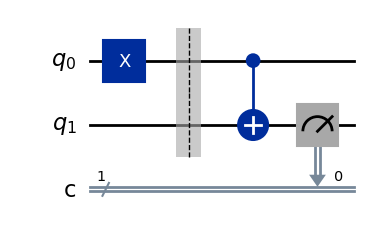

In [5]:
print("Verifying the XOR Gate")

# Loop through all 4 possible inputs.
for input1 in [0, 1]:
    for input2 in [0, 1]:
        # Create a circuit with 2 qubits and 1 classical bit.
        qc_xor = QuantumCircuit(2, 1)

        # Prepare the input states.
        if input1 == 1:
            qc_xor.x(0)
        if input2 == 1:
            qc_xor.x(1)
            
        qc_xor.barrier()

        # Apply the CNOT gate. q_0 is the control, q_1 is the target.
        qc_xor.cx(0, 1)

        qc_xor.barrier()
        
        # Measure the target qubit, which now holds the XOR result.
        qc_xor.measure(1, 0)

        # Simulate and print the result.
        job = backend.run(transpile(qc_xor, backend), shots=1)
        output = int(list(job.result().get_counts().keys())[0])
        print(f"Input: {input1}{input2}, Output: {output}")

# Visualization
qc_xor_example = QuantumCircuit(2, 1)
qc_xor_example.x(0)
qc_xor_example.barrier()
qc_xor_example.cx(0, 1)
qc_xor_example.measure(1, 0)
print("\nExample Circuit for XOR(1,0):")
display(qc_xor_example.draw('mpl'))

The time complexity for the above code is still O(1), even though we have two nested for loops; the number of times they run is fixed and constant.